<a href="https://colab.research.google.com/github/WomenPlusPlus/deploy-impact-21-kona-a/blob/add_analysis/kona-app/data/add_analysis/organization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Upload data

In [94]:
df = pd.read_json("/content/edited_subcategories24_11.json")
df

,ID,Name,TargetGroup,SubTargetGroup,MainCategory,SubCategory,SDG,Objective,Phone,Email,WebAddress,Address,Region
0,1,La Liane,"Children, Youth, Women","Victims of Violence,Domestic Violence,Disabled","Social Services, Health, Education, Employment","Food, Shelter,Disabled ,Socialisation, Integra...","No Poverty, No Hunger, Health, Education, Gend...",Better living conditions for women and children,"78 434 51 51 , 77 783 31 40",c.hallegot@laposte.net,https://laliane.eu,Ndiolofféne Nord,Saint-Louis
1,2,Association Jeunesse Espoir (AJS),"Children,Youth","Refugees,Vulnerable","Health,Education ,Employment,Migration","Entrepreneurship, Job Placement, Vocational Tr...","No Poverty, Health, Education, Work / Economic...",The main goal of AJS is to support children an...,"34 961 49 80 , 77 843 39 34",jeunesseespoir60@gmail.com,www.jeunesse-espoir-senegal.com,Hlm villa 407 derrière la Maison de Lille Sain...,Saint-Louis
2,3,Connexion Sans Frontieres,"Women,Children,Professionals",Professionals,Social Services,Protection,"No Poverty, Industry / Innovation / Infrastruc...","Integration of ICT in development policies, su...",776342646,aakcisse@gmail.com,,AVENUE CHEIKH ANTA DIOP,Dakar
3,4,African Network for Horticultural Development,"Men, Women, Children, Youth, Professionals","Farmers, Victims of Violence","Agriculture,Social Services,Employment,Legal","Seed Distribution, Conservation, Agricultural...",Sustainable Communities,Combining the experiences and resources availa...,,radhort@fao.org,www.fao.org/radhort,,Dakar
4,5,African Network for Integrated Development (ANID),Women,"Disabled,Prisoners,Vulnerable, Victims of Viol...","Legal,Employment,Social Services,Education","Human Rights, Local Policy,Partnerships,Victim...","No Poverty, Inequalities, Sustainable Communit...","Democratic development that benefits everyone,...",36 860 76 98,radi@orange.sn,www.radi-afrique.com,"Yoff virage, Lot 100",Dakar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,ACTED,"Men, Women, Children, Youth, Professionals",Entrepreneurs,"Education,Employment,Social Services ,Legal,Na...",,"Climate, No Hunger, No Poverty, Responsible Co...","Ending poverty, reinforcing NGO and Associations",,,www.acted.org,,Dakar
58,59,USAID,"Men, Women, Children, Youth, Professionals",,"Agriculture,Social Services,Education ,Legal ,...",,"Education, Work / Economic Growth, Health, No ...","Imrpoving development by creating jobs, improv...",33 879 4000,usaid-senegal@usaid.gov,www.usaid.gov/senegal,Route des Almadies,Dakar
59,60,UNOPS,Professionals,Farmers,"Partnerships,Legal,Health,Natural Resource Man...","Government, Financial Services,Food, Water, Hy...","Health, Water/Sanitation, Life on land, Indust...",Help and support to governments and communitie...,338693838,info.snoh@unops.org,www.unops.org/fr/senegal,,Dakar
60,61,PNUD / UNDP,Professionals,Homeless People,Partnerships,"Financial Support, Technology","Gender Equality, No Poverty, Justice / Institu...",Help government and communities reach the 17SDGs,338596767,,sn.undp.org,Route King Fahd,Dakar


## Correct a few categories 




In [95]:
## Correct a few categories 


In [96]:
df['SubTargetGroup'] = df.SubTargetGroup.str.replace(r'\bRefugee\b','Refugees', regex=True)
df['SubTargetGroup'] = df.SubTargetGroup.str.replace('Victim','Victims', regex=True)
df['SubTargetGroup'] = df.SubTargetGroup.str.replace('Victims of Violences','Victims', regex=True)
df['SDG'] = df.SDG.str.replace('\([0-9]+\)','', regex=True)


## Create function that breaks lists into strings for analysis


In [107]:
def count_frequency(col_name, title):
  df2 = col_name
  df2_split = df2.str.split(",")
  word_freq = {} 
  for row in df2_split:
    for word in row:
        word_trimmed = word.strip() 
        if (word_trimmed in word_freq): 
            word_freq[word_trimmed] += 1
        else: 
            word_freq[word_trimmed] = 1
  s = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])
  s = s.sort_values(by='Frequency', ascending=False)
  # Bar chart
  plt.figure(figsize=(10,15))
  s.plot.barh() 
  plt.style.use('ggplot')
  plt.xlabel("Category", size=15)
  plt.ylabel("Frequency", size=15)
  plt.title( title, size=18)
  return(s)


<Figure size 720x1080 with 0 Axes>

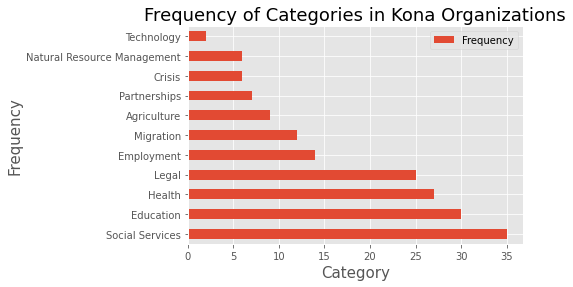

In [108]:
o = df['MainCategory']
title = "Frequency of Categories in Kona Organizations"
df3 = count_frequency(o, title)

Create Graphs



<Figure size 720x1080 with 0 Axes>

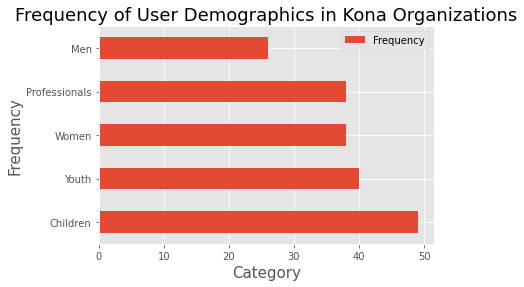

In [109]:
p= df['TargetGroup']
title = "Frequency of User Demographics in Kona Organizations"
df3 = count_frequency(p, title)

<Figure size 720x1080 with 0 Axes>

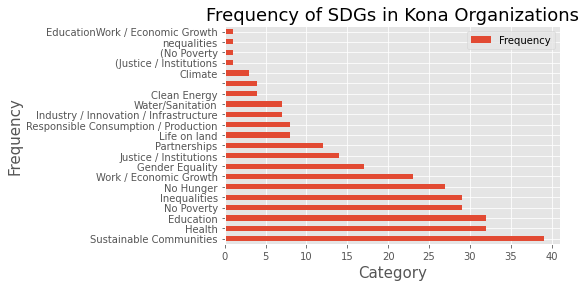

In [110]:
diff_df = df['SDG']
t = "Frequency of SDGs in Kona Organizations"
df4 = count_frequency(diff_df, t)

<Figure size 720x1080 with 0 Axes>

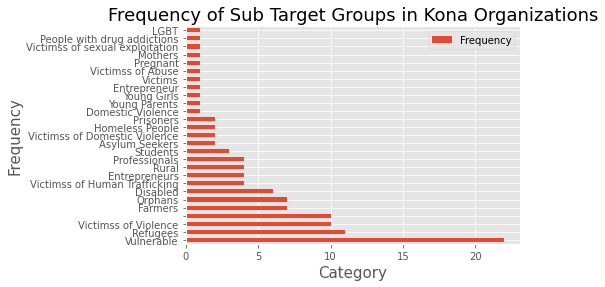

In [111]:
o = df['SubTargetGroup']
title = "Frequency of Sub Target Groups in Kona Organizations"
df3 = count_frequency(o, title)